In [1]:
import sklearn
import keras
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import tensorflow_datasets as tfds
import os

2022-08-31 13:35:09.908863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-31 13:35:09.908884: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Hyper Parameter
batch_size = 64
num_classes = 10
epochs = 10

In [3]:
# loading cifar10 datasets 
def load_data ():
    def preprocess_image(image, label):
        image = tf.image.convert_image_dtype (image, tf.float32)
        return image, label
    ds_train, info = tfds.load ("cifar10", with_info = True, split = "train", as_supervised = True)
    ds_test = tfds.load ("cifar10", split = "test", as_supervised = True)
    
#repeat datasets forever, shuffle, preprocess, split by batch 
    ds_train = ds_train.repeat (). shuffle (1024).map (preprocess_image).batch (batch_size)
    ds_test = ds_test.repeat (). shuffle (1024).map (preprocess_image).batch (batch_size)
    return ds_train, ds_test, info

construction of the model 

#Construction of the model

In [4]:
def create_model (input_shape):
    # building the moddel 
    model = Sequential ()
    model.add (Conv2D (filters = 32, kernel_size = (3,3), padding = 'same', input_shape = input_shape))
    model.add (Activation ( 'relu'))
    model.add (Conv2D (filters = 32, kernel_size = (3,3), padding = 'same'))
    model.add (Activation ( 'relu'))
    #
    model.add (MaxPooling2D (pool_size = (2, 2)))
    model.add (Dropout (0.25))
    model.add (Conv2D (filters = 64, kernel_size = (3,3), padding = 'same'))
    model.add (Activation ( 'relu'))
    model.add (Conv2D (filters = 64, kernel_size = (3,3), padding = 'same'))
    model.add (Activation ( 'relu'))
    model.add (MaxPooling2D (pool_size = (2, 2)))
    model.add (Dropout (0.25))
    model.add (Conv2D (filters= 128, kernel_size = (3,3), padding = 'same'))
    model.add (Activation ('relu'))
    model.add (Conv2D (filters= 128, kernel_size = (3,3), padding = 'same'))
    model.add (Activation ('relu'))
    model.add (MaxPooling2D (pool_size = (2, 2)))
    model.add (Dropout (0.25))
    #flattening the convolution 
    model.add (Flatten ())
    
    # fully connected layer 
    model.add (Dense (1024))
    model.add(Activation ('relu'))
    model.add (Dropout (0.5))
    model.add (Dense (num_classes, activation = 'softmax'))
    model.summary ()
    # training the model 
    model.compile (loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

Training the model 

In [ ]:
if __name__ == '__main__':
    # load the data 
    ds_train, ds_test, info = load_data ()
    # construct the model 
    model = create_model (input_shape = info.features ['image'].shape )
    #some nice callbacks 
    logdir = os.path.join ('logs', 'cifar10-v1')
    tensorboard = TensorBoard (log_dir = logdir)
    
    #make sure the results folder exists 
    if not os.path.isdir ("results"):
        os.mkdir ('results')
        
    # train 
    model.fit (ds_train, epochs = epochs, validation_data = ds_test, verbose = 1,
              steps_per_epoch = info.splits ["train"].num_examples // batch_size,
              validation_steps = info.splits ["train"].num_examples // batch_size,
              callbacks = [tensorboard])
    # save the model 
    model.save ("cifar.h5")

2022-08-31 13:35:31.959870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-31 13:35:31.959888: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-31 13:35:31.959899: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bishnu-ncuastro): /proc/driver/nvidia/version does not exist
2022-08-31 13:35:31.976540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [ ]:
#tensorboard --logdir="logs"

In [7]:
#pip install train


Note: you may need to restart the kernel to use updated packages.


In [9]:
#from train import load_data, batch_size 
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np


In [10]:
categories = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [13]:
# load the testing set
ds_train, ds_test, info = load_data()
# load the model with final model weights
model = load_model("/home/bishnu/Desktop/ML/cifar.h5")

In [24]:
# get prediction for this image
data_sample = next(iter(ds_test))
sample_image = data_sample[0].numpy()[0]
sample_label = categories[data_sample[1].numpy()[0]]
prediction = np.argmax(model.predict(sample_image.reshape(-1, *sample_image.shape))[0])
print("Predicted label:", categories[prediction])
print("True label:", sample_label)

1/1 [==============================] - 0s 11ms/step
Predicted label: bird
True label: bird


2022-08-31 12:06:59.218717: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


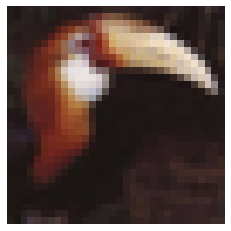

In [25]:
# show the image
plt.axis('off')
plt.imshow(sample_image)
plt.show()